# 02. Neural Network Regression with TensorFlow

**What we're going to cover**

- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
<br><br>
- Creating custom data to view and fit
<br><br>
- **Steps in modelling :**
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
<br><br>
- **Evaluating a model :**
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

# Linear probleme 

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

<br><br>

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [257]:
import tensorflow as tf
tf.__version__

'2.8.2'

## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

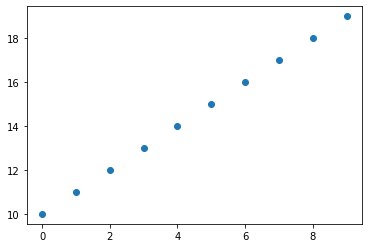

In [258]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(10)
y = X + 10

plt.scatter(X, y)

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the **input and output shapes**.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.


In [259]:
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])>)

We dont want shape=(10,) as input shape because each elements in `X` is use separtately to predict each element in `y` : `y = X+10`
> We need to change the shape to `(10,1)`

In [260]:
# 2 way to reshape your tensor
shape_y = tf.shape(y).numpy()[0]
y = tf.reshape(y, (shape_y, 1))

# or
X = tf.expand_dims(X, axis=-1)

# Note : you can also do it while creating the tensor : tf.constant(X, shape)

X, y

(<tf.Tensor: shape=(10, 1), dtype=int64, numpy=
 array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])>, <tf.Tensor: shape=(10, 1), dtype=int64, numpy=
 array([[10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19]])>)

## Steps in modelling with TensorFlow
In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

<br>

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.

In [261]:
# Setting seed for reproducable result:
tf.random.set_seed(0)

# Create the model :
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model :
model.compile(loss="mae", # mae is short for mean absolute error
              optimizer="sgd", # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model :
model.fit(X, y, epochs=100, verbose=False)

In [262]:
model.predict(X) # true label : [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

array([[ 0.8219996],
       [ 3.1353776],
       [ 5.4487557],
       [ 7.7621336],
       [10.075512 ],
       [12.38889  ],
       [14.702268 ],
       [17.015648 ],
       [19.329025 ],
       [21.642403 ]], dtype=float32)

In [263]:
model.predict([10]) # true label : 20

array([[23.955782]], dtype=float32)

## Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

In [264]:
model_ = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

model_.compile(loss="mae",
              optimizer="sgd",
              metrics=["mae"])

model_.fit(X, y, epochs=100, verbose=False)

In [265]:
model_.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 1)                 2         
                                                                 
 dense_211 (Dense)           (None, 16)                32        
                                                                 
 dense_212 (Dense)           (None, 1)                 17        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


**NOTE 1** : to use `summary` methode you need either to `fit`/`build` your model (Ex : `model.fit()`) <br>
neither explicit the `input_shape`, to do so you have 2 options :
* `th.keras.layer.Input(input_shape)`
* `tf.keras.layers.Dense(shape, input_shape)`

**NOTE 2** : Non-trainable parameters are typical when you bring in the already learned patterns from other models during transfer learning

In [266]:
model_.predict(X)

array([[ 4.6322293],
       [ 6.405689 ],
       [ 8.179147 ],
       [ 9.952606 ],
       [11.726065 ],
       [13.499523 ],
       [15.27298  ],
       [17.04644  ],
       [18.819899 ],
       [20.593357 ]], dtype=float32)

In [267]:
model_.evaluate(X, y)

1/1 [==============================] - 0s 104ms/step - loss: 2.3791 - mae: 2.3791


[2.379145860671997, 2.379145860671997]

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize !

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

=> Firstly : we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).
<br>
=> Secondly : split beteween testing and trainning data
<br>
=> Thirdly : build model
<br>
=> Fourthly : visualisation / prediction / evaluation

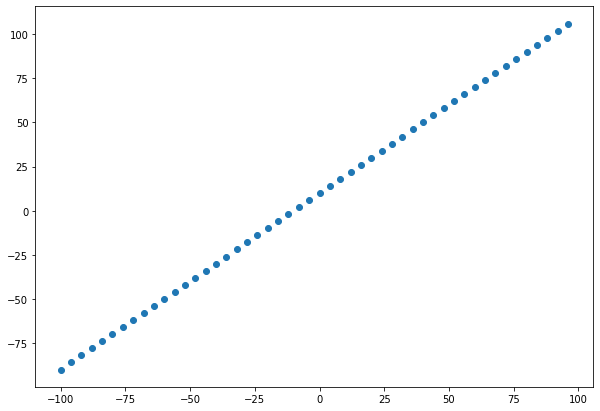

In [268]:
X = np.arange(-100, 100, 4)
y = X + 10

X = tf.constant(X, shape=(50, 1))
y = tf.constant(y, shape=(50, 1))

plt.figure(figsize=(10,7))
plt.scatter(X, y)

### Split data into trian/test sets

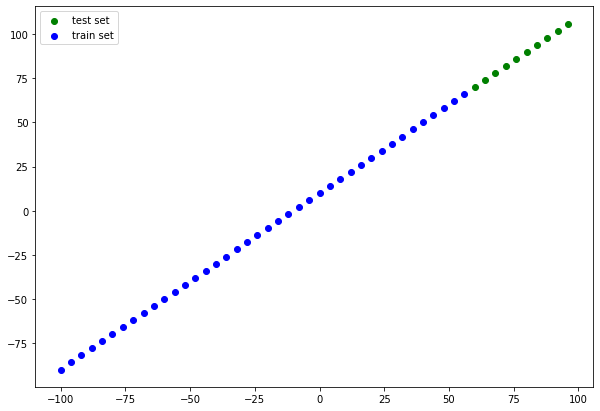

In [269]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

plt.figure(figsize=(10,7))
plt.scatter(X_test, y_test, c="green", label="test set")
plt.scatter(X_train, y_train, c="blue", label="train set")
plt.legend()

### Build model

In [270]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)) # input shape needed for summary
])

model.compile(loss="mae",
              optimizer="sgd",
              metrics=["mae"])

model.optimizer.learning_rate.assign(0.001)

model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_213 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [271]:
history = model.fit(X_train, y_train, epochs=100, verbose=False)

In [272]:
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 21ms/step - loss: 19.4126 - mae: 19.4126


([7.549121856689453, 7.549121856689453],
 [19.412595748901367, 19.412595748901367])

In [273]:
model.predict([0]) 

array([[0.09706253]], dtype=float32)

In [274]:
y_preds = model.predict(X_test)
mae = tf.metrics.mean_squared_error(tf.reshape(y_test,(len(y_test),)), 
                                               y_preds.squeeze()) # shape must be (N,) 
mae

<tf.Tensor: shape=(), dtype=float32, numpy=378.81094>

### Visualisation

1/1 [==============================] - 0s 19ms/step - loss: 19.4126 - mae: 19.4126


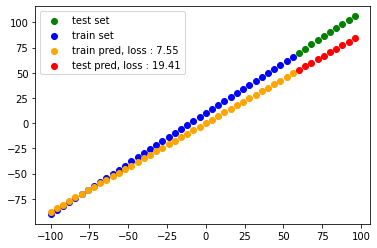

In [275]:
def plot_model_pred(model, X_train, y_train, X_test, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    train_loss = model.evaluate(X_train, y_train)[0]
    test_loss = model.evaluate(X_test, y_test)[0]

    plt.scatter(X_test, y_test, c="green", label="test set")
    plt.scatter(X_train, y_train, c="blue", label="train set")
    plt.scatter(X_train, y_train_pred, c="orange", label=f"train pred, loss : {train_loss:.2f}")
    plt.scatter(X_test, y_test_pred, c="red", label=f"test pred, loss : {test_loss:.2f}")
    plt.legend()

plot_model_pred(model, X_train, y_train, X_test, y_test)

#### History

In [276]:
import pandas as pd 

df = pd.DataFrame(history.history)
df.head()

,loss,mae
0,112.586060,112.586060
1,108.789261,108.789261
2,104.837791,104.837791
3,101.441078,101.441078
4,97.822968,97.822968


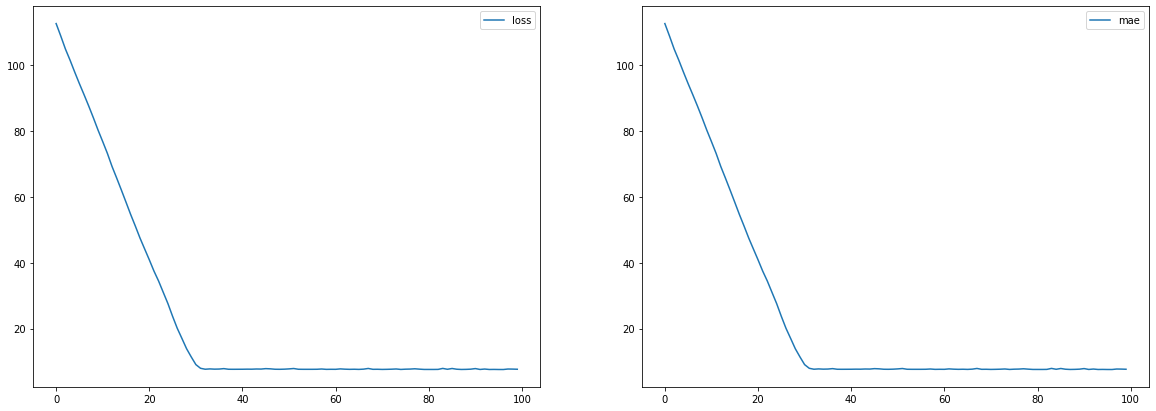

In [277]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,7))

ax1.plot(df.loss, label="loss")
ax1.legend()

ax2.plot(df.mae, label="mae")
ax2.legend()

#### Model

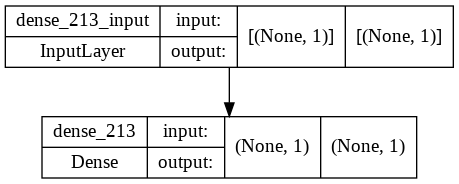

In [278]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In our case, the model we used only has an input and an output but visualizing more complicated models can be very helpful for debugging.

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs, learning_rate:0.01.
3. `model_3` - 2 layers, trained for 500 epochs.
4. `model_4` - 2 layers, trained for 100 epochs, learning_rate:0.001 .

**Set random seed first**

In [279]:
# Set random seed
tf.random.set_seed(42)

**Build `model_1`**

In [280]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

model_1.compile(loss="mae",
                optimizer="sgd",
                metrics=["mae", tf.keras.metrics.RootMeanSquaredError()])

history_1 = model_1.fit(X_train, y_train, epochs=100, verbose=False)

**Build `model_2`**

In [281]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss="mae",
                optimizer="sgd",
                metrics=["mae", tf.keras.metrics.RootMeanSquaredError()])

model_2.optimizer.learning_rate.assign(0.01)

history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=False)

**Build `model_3`**

In [282]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss="mae",
                optimizer="sgd",
                metrics=["mae", tf.keras.metrics.RootMeanSquaredError()])

history_3 = model_3.fit(X_train, y_train, epochs=500, verbose=False)

**Build `model_4`**

In [283]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss="mae",
                optimizer="sgd",
                metrics=["mae", tf.keras.metrics.RootMeanSquaredError()])

model_4.optimizer.learning_rate.assign(0.001)

history_4 = model_4.fit(X_train, y_train, epochs=100, verbose=False)

### Comparaison plot

1/1 [==============================] - 0s 18ms/step - loss: 15.4072 - mae: 15.4072 - root_mean_squared_error: 15.4291


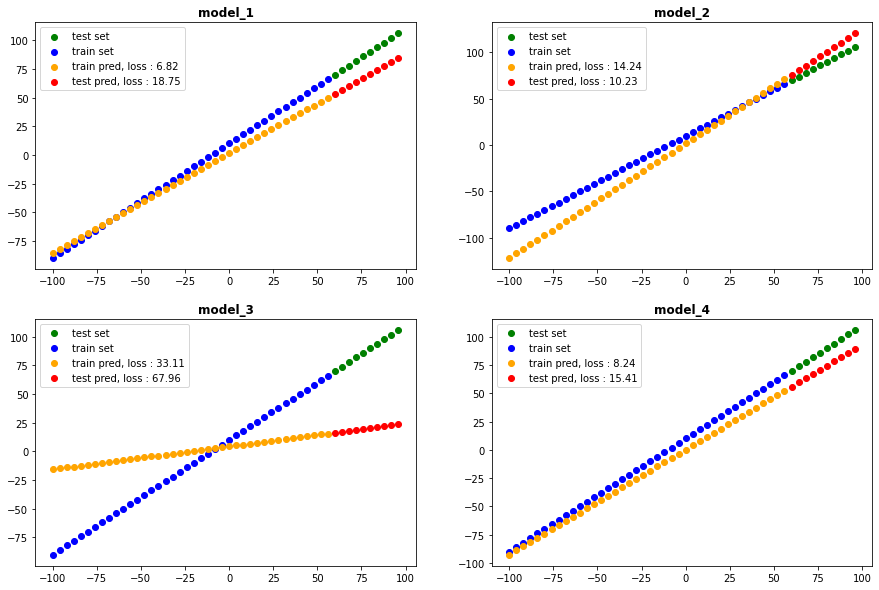

In [284]:
models = [model_1, model_2, model_3, model_4]

plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2, i+1)
    plt.title(f"model_{i+1}", weight="bold")
    plot_model_pred(models[i], X_train, y_train, X_test, y_test)

In [285]:
history_1_df = pd.DataFrame(history_1.history)
history_2_df = pd.DataFrame(history_2.history)
history_3_df = pd.DataFrame(history_3.history)
history_4_df = pd.DataFrame(history_4.history)

my_history = [history_1_df, history_2_df, history_3_df, history_4_df]

### plot history

In [345]:
def plot_one_history(history, figsize=(15,6)):
    df = pd.DataFrame(history.history)
    n = len(df.columns)

    plt.figure(figsize=figsize)
    for i,column in enumerate(df.columns):
        plt.subplot(1, n, i+1)
        plt.plot(df[f"{column}"])
        plt.xlabel("epochs")
        plt.ylabel(f"{column}")
        plt.tight_layout() # padding

In [354]:
def plot_history(my_history):
    n = len(my_history)
    fig, axs = plt.subplots(n, 2, figsize=(4*n,4*n))

    for i, history_df in enumerate(my_history):
        axs[i,0].set_ylabel(f"model_{i+1}", weight="bold")
        axs[i,0].set_xlabel("epochs")
        axs[i,1].set_xlabel("epochs")

        axs[i,0].plot(history_df.loss, label="loss:mae")
        axs[i,0].legend()

        axs[i,1].plot(history_df.root_mean_squared_error, label="root_mean_squared_error")
        axs[i,1].legend()

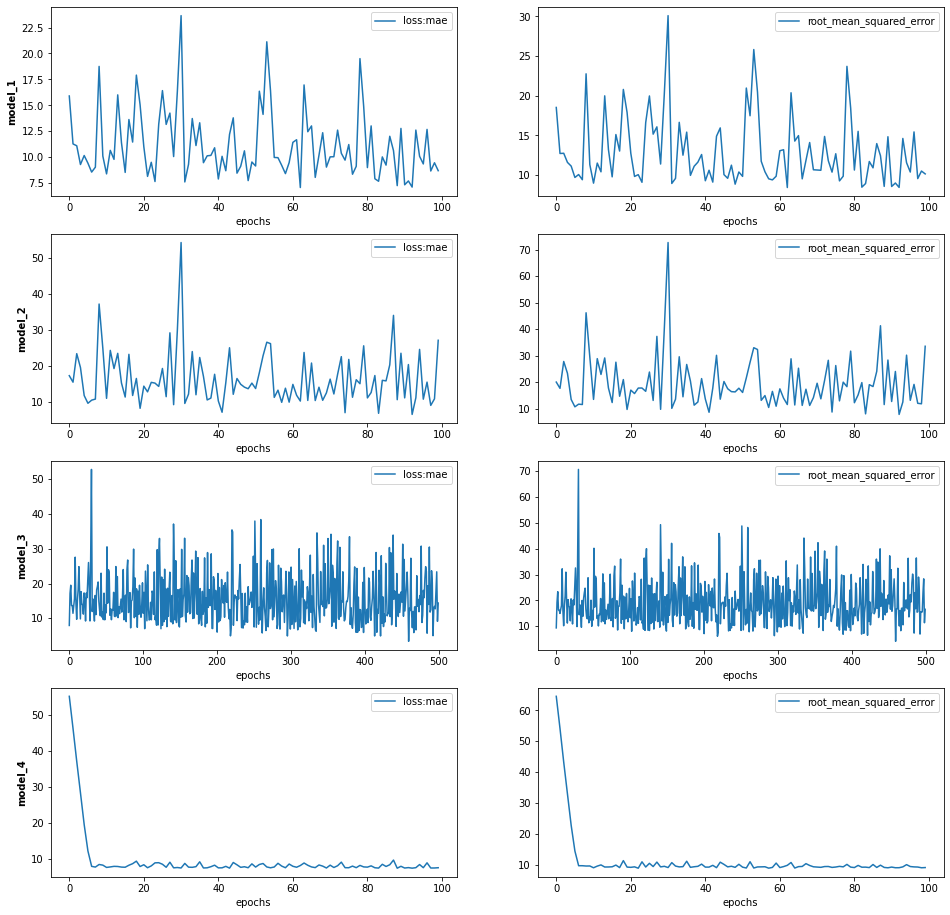

In [355]:
plot_history(my_history)

**Model 1 to 3 have learning rate issues, best model is model 4**

### Comparaison metrics

In [289]:
eval_1 = model_1.evaluate(X_test, y_test)
eval_2 = model_2.evaluate(X_test, y_test)
eval_3 = model_3.evaluate(X_test, y_test)
eval_4 = model_4.evaluate(X_test, y_test)

evals = [["model_1", *eval_1],
         ["model_2", *eval_2],
         ["model_3", *eval_3],
         ["model_4", *eval_4]]

df_eval = pd.DataFrame(evals, columns=["model", "loss", "mae", "rmse"])

1/1 [==============================] - 0s 24ms/step - loss: 15.4072 - mae: 15.4072 - root_mean_squared_error: 15.4291


In [290]:
df_eval

,model,loss,mae,rmse
0,model_1,18.745327,18.745327,18.803547
1,model_2,10.229783,10.229783,10.585342
2,model_3,67.959915,67.959915,68.578217
3,model_4,15.407166,15.407166,15.429130


## Saving a model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

**The main difference between the two is the `SavedModel` is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.
<br><br>
OLSO when saving using `SavedModel` it create a directory BUT with HDF5 format you need to add the extetion ".h5"**

### SavedModel Format

In [291]:
# Save a model using the SavedModel format
model_2.save('model_SavedModel_format')

In [292]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls

model_HDF5_format.h5  model.png  model_SavedModel_format  sample_data


In [293]:
!ls model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


### HDF5 format

In [294]:
# Save a model using the HDF5 format
model_4.save("model_HDF5_format.h5") # note the addition of '.h5' on the end

## Loading model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

### SavedModel format

In [295]:
# Load a model from the SavedModel format
loaded_SavaedModel_model = tf.keras.models.load_model("model_SavedModel_format")
loaded_SavaedModel_model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_215 (Dense)           (None, 1)                 2         
                                                                 
 dense_216 (Dense)           (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [296]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_SavaedModel_model.predict(X_test)

np.all(model_2_preds == saved_model_preds)

True

### HDF5 format

In [297]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_219 (Dense)           (None, 1)                 2         
                                                                 
 dense_220 (Dense)           (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [298]:
model_4_preds = model_4.predict(X_test)
h5_model_preds = loaded_h5_model.predict(X_test)

np.all(model_4_preds == h5_model_preds)

True

## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [299]:
# Download the model (or any file) from Google Colab
from google.colab import files

files.download("model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Non Linear probleme :

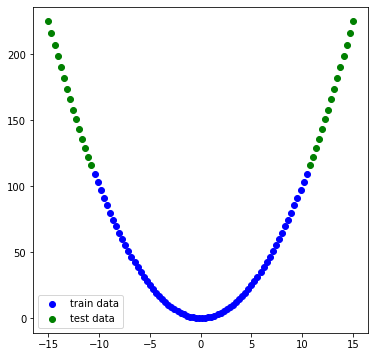

In [336]:
X = np.linspace(-15, 15, 100)
y = X**2

X_train = X[15:85]
y_train = y[15:85]
X_test = np.concatenate((X[:15], X[85:]))
y_test = np.concatenate((y[:15], y[85:]))

plt.figure(figsize=(6,6))
plt.scatter(X_train,y_train, c="blue", label="train data")
plt.scatter(X_test,y_test, c="green", label="test data")
plt.legend();

1/1 [==============================] - 0s 17ms/step - loss: 138.5832 - root_mean_squared_error: 142.6643


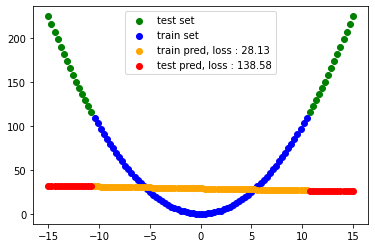

In [301]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer="adam",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.fit(X_train, y_train, epochs=100, verbose=False)
plot_model_pred(model, X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 14217.3750 - root_mean_squared_error: 119.2366


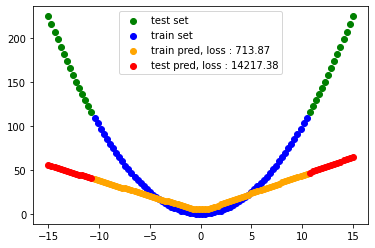

In [302]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear",input_shape=(1,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss="mse",
              optimizer="adam",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.fit(X_train, y_train, epochs=100, verbose=False)
plot_model_pred(model, X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 405.7587 - root_mean_squared_error: 20.1435


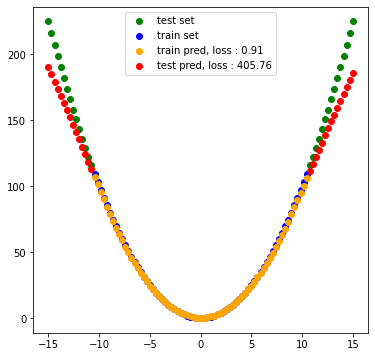

In [348]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear",input_shape=(1,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss="mse",
              optimizer="adam",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=200, verbose=False)

plt.figure(figsize=(6,6))
plot_model_pred(model, X_train, y_train, X_test, y_test)

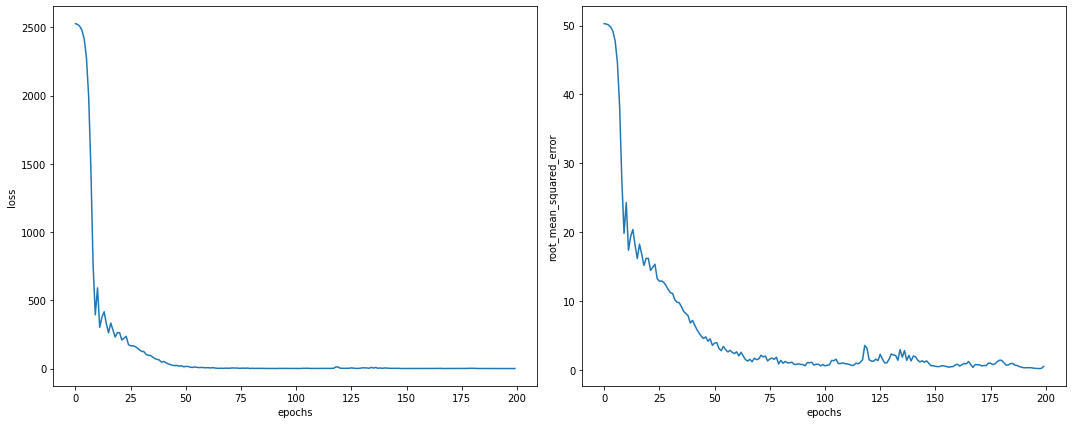

In [349]:
plot_one_history(history)

**Probleme : only work for data in range of the training set**

# A larger example

Alright, we've seen the fundamentals of building neural network **regression** models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

In [390]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [391]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical (categorical) columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [392]:
df = pd.get_dummies(insurance)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [393]:
# Create X & y values
X = df.drop("charges", axis=1)
y = df["charges"]

In [394]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0) # set random state for reproducible splits

X_train.shape

(1070, 11)

In [395]:
tf.random.set_seed(0)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(11,)),
    tf.keras.layers.Dense(1) # output shape has to be 1
])

model.compile(loss="mae",
              optimizer="sgd",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_440 (Dense)           (None, 1)                 12        
                                                                 
 dense_441 (Dense)           (None, 1)                 2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [396]:
history = model.fit(X_train, y_train, epochs=100, verbose=False)

In [397]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8385.6572 - root_mean_squared_error: 10460.7725


[8385.6572265625, 10460.7724609375]

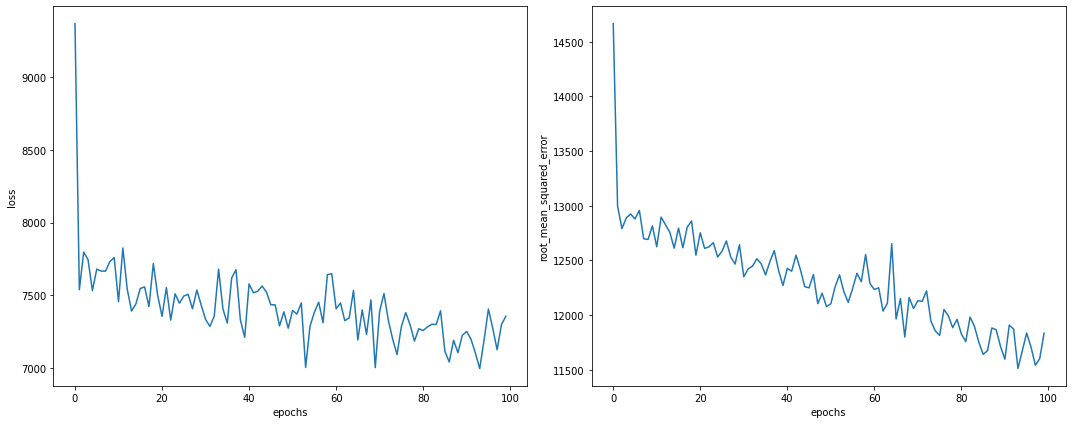

In [398]:
plot_one_history(history)

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam) otherwise => nan value.

Everything else will stay the same.

In [399]:
tf.random.set_seed(0)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(11,)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1) # output shape has to be 1
])

model_2.compile(loss="mae",
              optimizer="adam", # Adam works but SGD doesn't
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model_2.summary()

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_442 (Dense)           (None, 128)               1536      
                                                                 
 dense_443 (Dense)           (None, 128)               16512     
                                                                 
 dense_444 (Dense)           (None, 1)                 129       
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


In [400]:
history = model_2.fit(X_train, y_train, epochs=100, verbose=False)

In [401]:
model_2.evaluate(X_test, y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 3560.0850 - root_mean_squared_error: 6664.3833


[3560.0849609375, 6664.38330078125]

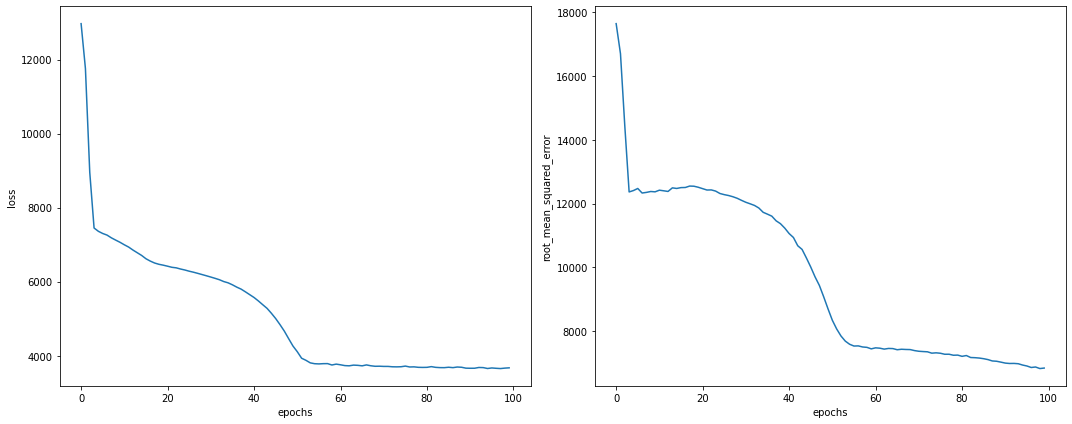

In [402]:
plot_one_history(history)

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

> 🔑 **Note:** For many problems, the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) is a great starting choice. See Andrei Karpathy's "Adam is safe" point from [*A Recipe for Training Neural Networks*](http://karpathy.github.io/2019/04/25/recipe/) for more. 

In [403]:
# Try training for a little longer (100 more epochs)
history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [404]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3058.7678 - root_mean_squared_error: 6285.4336


[3058.767822265625, 6285.43359375]

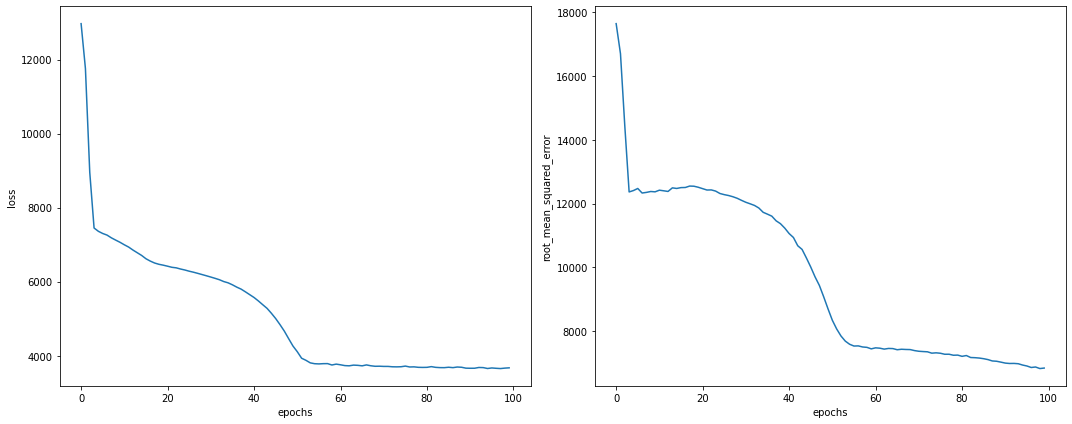

In [405]:
plot_one_history(history) #need two in the list : otherwise => error

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.
This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a **pre-processing pipeline**.

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (No strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data, I'd recommend reading the following resources:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In [389]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [362]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X = insurance.drop("charges", axis=1)
y = insurance.charges

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0) # set random state for reproducible splits

Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [363]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_selector

categorical_features = make_column_selector(dtype_exclude=np.number) # i.e. categorical_features=["sex", "smoker", "region"]
numerical_features = make_column_selector(dtype_include=np.number) # i.e. numerical_features=["age", "bmi", "children"]

transformer = make_column_transformer([MinMaxScaler(), numerical_features],
                                      [OneHotEncoder(), categorical_features])

X_train_normal = transformer.fit_transform(X_train)
X_test_normal = transformer.transform(X_test)

pd.DataFrame(X_train_normal).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.413043,0.488028,0.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.496906,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.108696,0.557170,0.4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.304348,0.517622,0.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.869565,0.442158,0.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [364]:
X_train_normal.shape, X_train.shape # diff due to OneHotEncoder

((1070, 11), (1070, 6))

In [365]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [366]:
X_train_normal[0]

array([0.41304348, 0.48802798, 0.8       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        ])

In [367]:
tf.random.set_seed(0)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(11,)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer="adam",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_357 (Dense)           (None, 128)               1536      
                                                                 
 dense_358 (Dense)           (None, 128)               16512     
                                                                 
 dense_359 (Dense)           (None, 1)                 129       
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


In [368]:
history = model.fit(X_train_normal, y_train, epochs=100, verbose=False)

In [369]:
model.evaluate(X_test_normal, y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 3064.1836 - root_mean_squared_error: 6247.5493


[3064.18359375, 6247.54931640625]

**Previously (without normalisation) => mae:3560, rmse:6664**

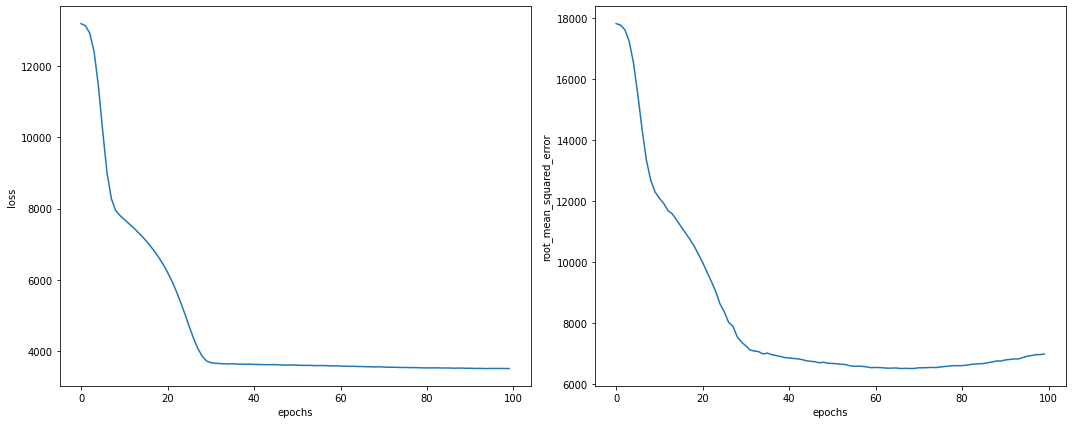

In [370]:
plot_one_history(history) 

**Need to change the learning rate**

In [371]:
tf.random.set_seed(0)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(11,)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_360 (Dense)           (None, 128)               1536      
                                                                 
 dense_361 (Dense)           (None, 128)               16512     
                                                                 
 dense_362 (Dense)           (None, 1)                 129       
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


In [372]:
history = model.fit(X_train_normal, y_train, epochs=500, verbose=False)

In [373]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 3489.6838 - root_mean_squared_error: 6463.4131


[3489.683837890625, 6463.4130859375]

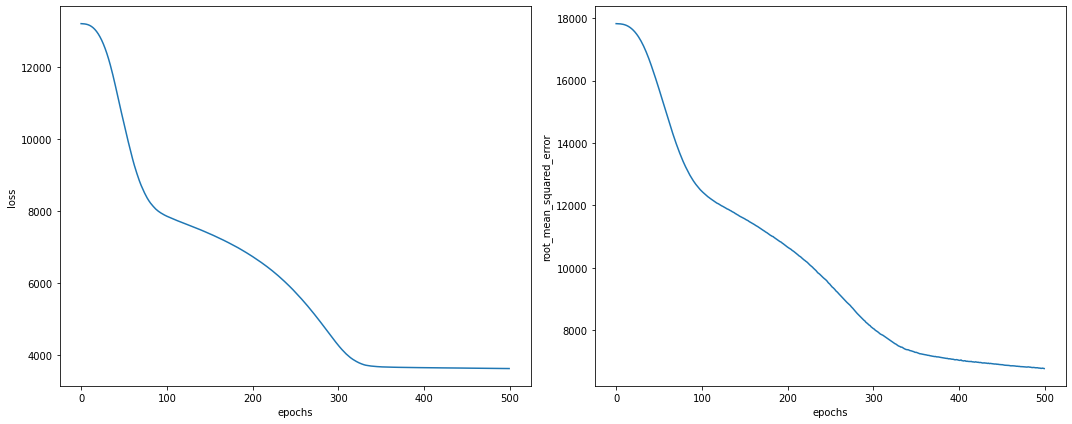

In [374]:
plot_one_history(history)

## Deep neural network

9/9 [==============================] - 0s 3ms/step - loss: 1600.0677 - root_mean_squared_error: 4159.2637


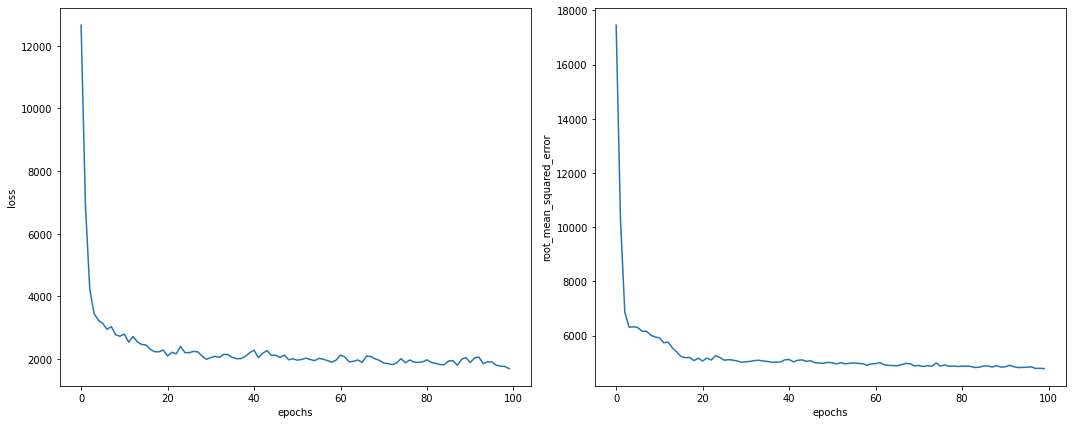

In [381]:
tf.random.set_seed(0)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(11,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss="mae",
              optimizer="adam",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train_normal, y_train, epochs=100, verbose=False)
model.evaluate(X_test_normal, y_test)
plot_one_history(history)